In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
rcParams.update({'font.size':16})


import numpy as np
from ipywidgets import widgets
import matplotlib.pyplot as plt

from mpmath import mp
mp.dps = 50

import multiprocessing
import itertools

In [2]:

def spec(f,k,V,t):
    t_n = t*mp.exp(k*V/(mp.mpf(4.04*10**-21)))
    return mp.mpf((2 * t_n)/(mp.pi*(1+mp.power(2,t_n*f))))

def F1(f,b,T2):
    w_p = mp.mpf(2.865E9 + 28E6*b)
    w_n = mp.mpf(2.865E9 - 28E6*b)
    k = mp.mpf(1/T2)
    return mp.mpf((1/mp.pi)*( k/(k**2 + mp.power(f-w_p,2)) + k/(k**2 + mp.power(f-w_n,2))))

def F2(f,tau):
    return (1/(4*mp.pi**2)) * (2/tau) * mp.sin(2*mp.pi*tau*f/4.)**4 / (f/4.)**2

def T1_pred(b,r,b_v,k,t):
   
    V =  mp.mpf(4/3.0*np.pi*(r*1E-9)**3)
    w_p = mp.mpf(2.865E9 + 28E6*b)
    w_n = mp.mpf(2.865E9 - 28E6*b)
    i = lambda f: F1(f,b,T2)*spec(f,k,V,t)
    S = mp.quad(i,[1E8,w_n-1E8,w_n+1E8,w_p-1E8,w_p+1E8,1E10])
    G_ext = mp.mpf(28E6**2*b_v**2*S)
    return mp.mpf(1/(1/T1+G_ext))

def T2_pred(tau,r,b_v,k,t):
    V =  mp.mpf(4/3.0*np.pi*(r*1E-9)**3)
    i = lambda f: F2(f,tau*2)*spec(f,k,V,t)
    S = mp.quad(i,[1E4,1/tau-1E6,1/tau+1E6,1E8])
    G_ext = mp.mpf(28E6**2*b_v**2*S)
    return mp.mpf(1/(1/T2+G_ext))


In [3]:
def pred_time(T_pred,g):    
    return 1 / np.sum( g/np.sum(g,axis=0)*(1/np.array(T_pred[:,np.newaxis])),axis=0)

def gaussian(X,mu,sigma):
    return np.exp( -(X[:,np.newaxis]-mu)**2/(2*sigma**2) )

In [4]:
MNP2_T1 = np.array([1460,386,4012,195,525,2770,1258,1075,324,483,1795,15735,537,339,1319,2247,4462,2217,751,678])*1E-9
MNP11_T1 = np.array([21261,8448,35817,3809,6106,582])*1E-9
MNP5_T1 = np.array([6199,959,5998,5619])*1E-9
MNP12_T1 = np.array([27245,3128,4254,11391,14723,12519,42427,16878,47553,25542,39281])*1E-9
bare_T1 = np.array([292853,319588,100662,31148,54657,46828,99135,229618])*1E-9

MNP2_T2 = np.array([256,829])*1E-9
MNP4_T2 = np.array([926,1226,961,939,729,567,2194,433,1136])*1E-9
MNP5_T2 = np.array([124,654])*1E-9
MNP12_T2 = np.array([471,597,670])*1E-9
bare_T2 = 2074E-9

In [5]:
T1_size = np.array([ [5.6,1.9], [19,4.5], [21,3.7], [2.53,0.76]])
#T2_size = np.array([ [5.6,1.9], [19,4.5], [2.53,0.76]])
T2_size = np.array([ [5.6,1.9], [2.53,0.76]])

In [6]:
T1s = list(np.log10(np.mean(T)) for T in [MNP2_T1,MNP5_T1,MNP11_T1,MNP12_T1])
#T2s = list(np.log10(np.mean(T)) for T in [MNP2_T2,MNP5_T2,MNP12_T1])
T2s = list(np.log10(np.mean(T)) for T in [MNP2_T2,MNP12_T1])
T1s = np.array(T1s)
T2s = np.array(T2s)

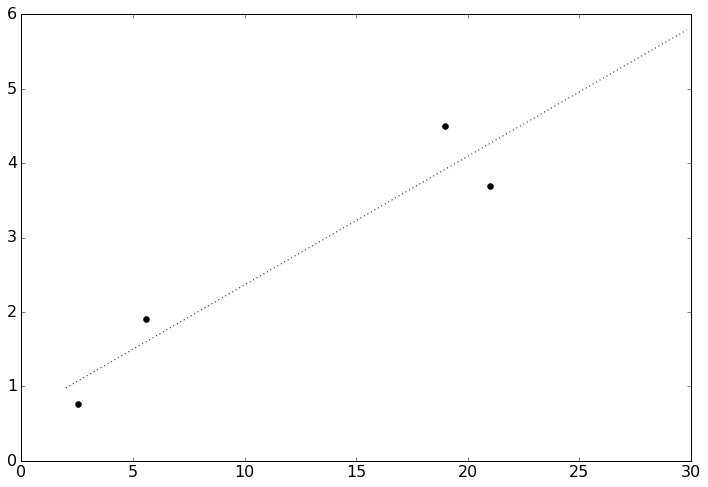

In [9]:
plt.plot(T1_size[:,0],T1_size[:,1],'ko')
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(T1_size[:,0],T1_size[:,1])
plt.plot(R*2,slope*R*2+intercept,'k:')

In [8]:
b_v = 2.8
R = np.arange(1,15,0.1)
gs = 30

T1 = np.mean(bare_T1)
T2 = np.mean(bare_T2)

k = np.linspace(1E4,5E4,gs)
t = np.linspace(-12,-8,gs)

tl1 = np.zeros((gs,gs,R.shape[0]))
tl2 = np.zeros((gs,gs,R.shape[0]))



params = itertools.product(k,t,R)

def T1f(p):
    return T1_pred(0,p[2],b_v*(p[2]/3),p[0],p[1])

def T2f(p):
    return T2_pred(5E-7,p[2],b_v*(p[2]/3),p[0],p[1])

#T1_0 = pool.map(T1f,params)
#T2_0 = pool.map(T2f,params)

In [ ]:
%%time
params = itertools.product(k,t,R)
T1_0 = list( T1f(p) for p in list(params) )
print len(T1_0)

In [ ]:
%%time
params = itertools.product(k,t,R)
#T1_0 = pool.map(T1f,list(params))

In [ ]:
T1_0

In [10]:
import cPickle as pickle
T1_0 = pickle.load( open( "T1_b2.p", "r" ) )
T2_0 = pickle.load( open( "T2_b2.p", "r" ) )


In [11]:
len(T1_0) - gs*gs*gs/2*R.shape[0]

0L

In [12]:
plt.plot(2*R,T2_arr[0,10,:],'ko:')

NameError: name 'T2_arr' is not defined

In [200]:
l10 = np.frompyfunc(mp.log10,1,1)
l10(pred_time(T1_arr[i,j,m,:],gaussian(2*R,T1_size[:,0],T1_size[:,1])))

array([mpf('-3.8628293430257656146492501276992531821593931004528447'),
       mpf('-4.2759632090112092154043217816699329933354591807799005'),
       mpf('-4.0272304608182261545144001098047965949264030446384327'),
       mpf('-3.8352273703669268542153546458518642197650949246871373')], dtype=object)

In [216]:
k = np.linspace(5E3,5E4,gs)
t = np.linspace(-12,-8,gs)
b = np.linspace(0.5,5,gs/2)

t1_grid = np.zeros((gs,gs,gs/2))
t2_grid = np.zeros((gs,gs,gs/2))

T1_arr = np.reshape(np.array(T1_0),[gs,gs,gs/2,len(R)])
T2_arr = np.reshape(np.array(T2_0),[gs,gs,gs/2,len(R)])
l10 = np.frompyfunc(mp.log10,1,1)

for i in range(k.shape[0]):
    for j in range(t.shape[0]):
        for m in range(b.shape[0]):
            err = T1s - l10(pred_time(T1_arr[i,j,m,:],gaussian(2*R,T1_size[:,0],T1_size[:,1])))
            err2 = T2s - l10(pred_time(T2_arr[i,j,m,:]*0.75,gaussian(2*R,T2_size[:,0],T2_size[:,1])))
            t1_grid[i,j,m] = np.sqrt(np.mean(err**2))
            t2_grid[i,j,m] = np.sqrt(np.mean(err2**2))

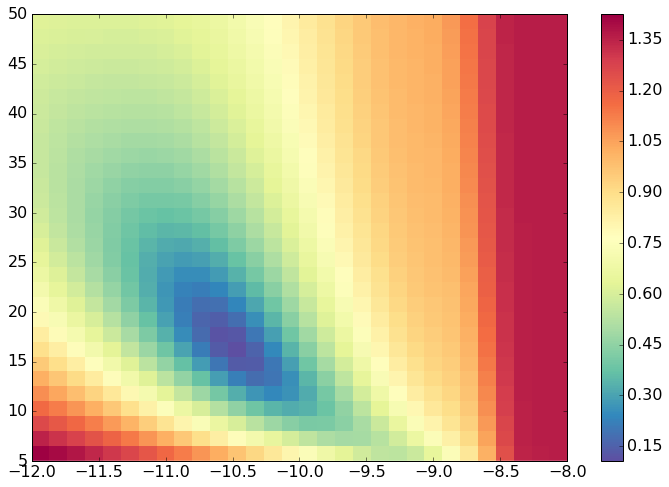

In [218]:
plt.imshow(t1_grid[:,:,9],cmap=plt.get_cmap('Spectral_r'), interpolation='none',
          extent=[-12,-8,5,50],aspect='auto',origin='lower')
plt.colorbar()
plt.show()

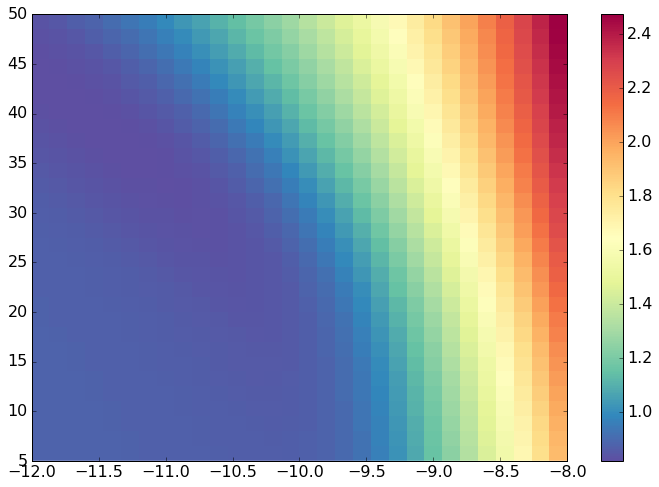

In [219]:
plt.imshow(t2_grid[:,:,9],cmap=plt.get_cmap('Spectral_r'), interpolation='none',
          extent=[-12,-8,5,50],aspect='auto',origin='lower')
plt.colorbar()
plt.show()

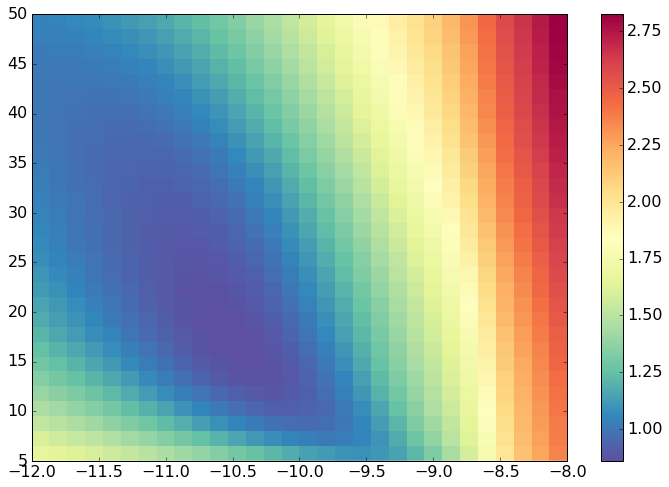

In [220]:
plt.imshow(np.sqrt(t2_grid**2+t1_grid**2)[:,:,9],cmap=plt.get_cmap('Spectral_r'), interpolation='none',
          extent=[-12,-8,5,50],aspect='auto',origin='lower')
plt.colorbar()
plt.show()

In [217]:
t_grid = np.sqrt(t2_grid**2+t1_grid**2)
m = np.argmin(t1_grid)
print m
print t1_grid.shape
print (m/(gs*gs/2),(m%(gs*gs/2)/gs/2),m%(gs/2))

3324
(30L, 30L, 15L)
(7, 2, 9)


In [182]:
g = gaussian(R*2,R*2,slope*R*2+intercept)
p = pred_time(T1_fit,g)
p.shape

(140L,)

(0, 30)

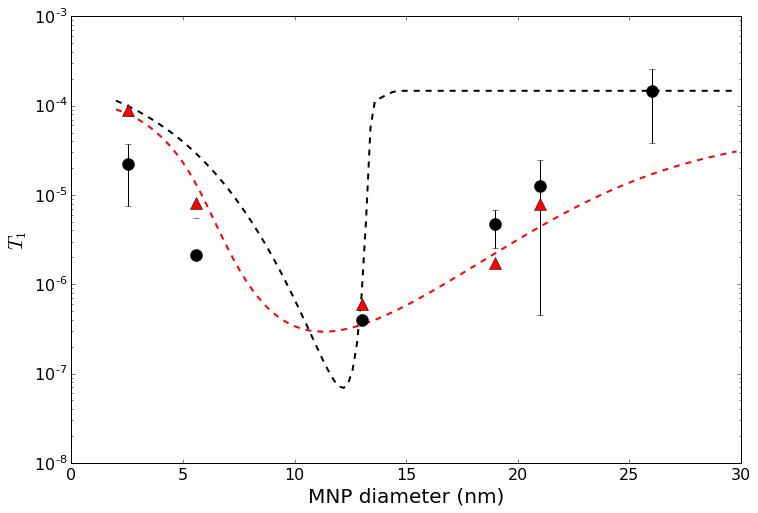

In [223]:
t_grid = np.sqrt(t2_grid**2+t1_grid**2)
m = np.argmin(t_grid)
T1_fit = T1_arr[m/(gs*gs/2),(m%(gs*gs/2)/gs/2),m%(gs/2),:]



plt.rcParams['lines.markersize']=12
f, ax1 = plt.subplots()
ax1.semilogy(R*2,T1_fit,'k--',linewidth=2,label='T1')
g = gaussian(R*2,R*2,slope*R*2+intercept)
ax1.plot(2*R,pred_time(T1_fit,g),'r--',linewidth=2)



ax1.errorbar(26,np.mean(bare_T1),fmt='ko',yerr=np.std(bare_T1))
ax1.errorbar(5.6,np.mean(MNP2_T1),fmt='ko',yerr=np.std(MNP2_T1))
ax1.errorbar(21,np.mean(MNP11_T1),fmt='ko',yerr=np.std(MNP11_T1))
ax1.errorbar(19,np.mean(MNP5_T1),fmt='ko',yerr=np.std(MNP5_T1))
ax1.plot(13,400E-9,'ko')
ax1.errorbar(2.53,np.mean(MNP12_T1),fmt='ko',yerr=np.std(MNP12_T1))


ax1.plot(5.6,pred_time(T1_fit,gaussian(R*2,5.6,1.9)),'^',color = 'r')
ax1.plot(21,pred_time(T1_fit,gaussian(R*2,21,3.7)),'^',color = 'r')
ax1.plot(19,pred_time(T1_fit,gaussian(R*2,19,4.5)),'^',color = 'r')
ax1.plot(13,pred_time(T1_fit,gaussian(R*2,13,5.5)),'^',color = 'r')
ax1.plot(2.53,pred_time(T1_fit,gaussian(R*2,2.53,0.76)),'^',color = 'r')


ax1.set_xlabel("MNP diameter (nm)",fontsize=20)
ax1.set_ylabel("$T_1$",fontsize=20)
ax1.set_xlim([0,30])

(0, 30)

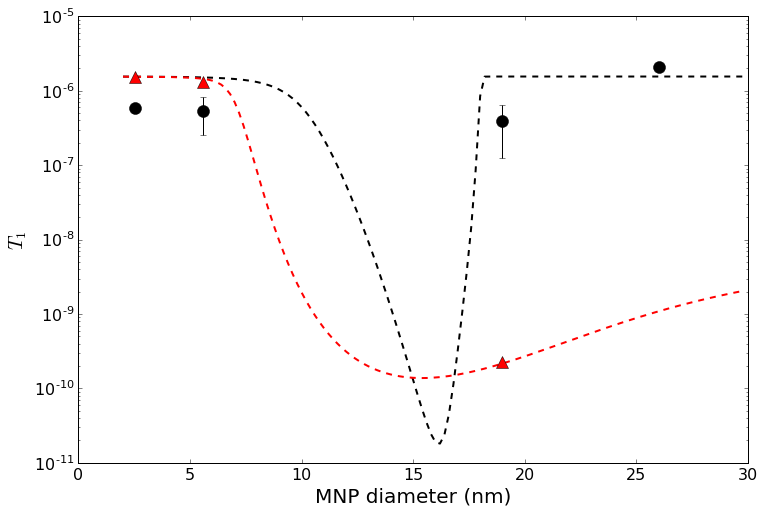

In [224]:
plt.rcParams['lines.markersize']=12
f, ax1 = plt.subplots()
t_grid = np.sqrt(t2_grid**2+t1_grid**2)
m = np.argmin(t_grid)
T2_fit = T2_arr[m/(gs*gs/2),(m%(gs*gs/2)/gs/2),m%(gs/2),:]*0.75

ax1.semilogy(R*2,T2_fit,'k--',linewidth=2,label='T1')
g = gaussian(R*2,R*2,slope*R*2+intercept)
ax1.plot(2*R,pred_time(T2_fit,g),'r--',linewidth=2)

ax1.plot(26,np.mean(bare_T2),'ko')


ax1.errorbar(5.6,np.mean(MNP2_T2),fmt='ko',yerr=np.std(MNP2_T2))
ax1.plot(5.6,pred_time(T2_fit,gaussian(R*2,5.6,1.9)),'r^')

#ax1.plot(np.ones_like(MNP4_T2)*23.7,MNP4_T2,'bo')
#ax1.plot(23.7,pred_time(T2_fit,gaussian(R*2,23.7,7)),'b^')


ax1.errorbar(19,np.mean(MNP5_T2),fmt='ko',yerr=np.std(MNP5_T2))
ax1.plot(19,pred_time(T2_fit,gaussian(R*2,19,4.5)),'r^')


#ax1.plot(13,400E-9,'o',color='purple')
#ax1.plot(13,pred_time(T2_fit,gaussian(R*2,13,5.5)),'^',color='purple')

ax1.errorbar(2.53,np.mean(MNP12_T2),fmt='ko',yerr=np.std(MNP12_T2))
ax1.plot(2.53,pred_time(T2_fit,gaussian(R*2,2.53,0.76)),'^',color='r')

#plt.plot(8,0,'go')
#plt.plot(R*2,T2,'r-o',linewidth=2,label='T2')
ax1.set_xlabel("MNP diameter (nm)",fontsize=20)
ax1.set_ylabel("$T_1$",fontsize=20)
#plt.ylabel("$T_{MNP} / T_{bare} $",fontsize=24)
ax1.set_xlim([0,30])
#ax1.set_ylim([20E-9,1E-3])
#plt.legend()

In [90]:
k[889/30]

50000.0

In [91]:
t[889%30]

-9.3793103448275872

In [93]:
889/30

29